<a href="https://colab.research.google.com/github/Rohan30/Rohan30/blob/main/CHDCardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Cardiovascular Risk Prediction**

**Project Type** - **Classification**

**Contribution** - **Individual**

GitHub Repository Link: https://github.com/Rohan30/Rohan30

#**Problem Statement**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachussets. The classification goal is to predict whether a patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

##**Business context**

#***Let's Begin !***

##***1. Know Your Data***

###Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Dataset Loading

In [2]:
#mount the dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
df1=pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

####Dataset Description

###Dataset First View

In [4]:
#head of the dataset
df1.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
#tail of the dataset
df1.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

###Dataset Rows & Columns count

In [6]:
# Dataset rows and columns
df1.shape

(3390, 17)

###Dataset Information

In [7]:
#Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

No Duplicate Values were found in the dataset.

Missing Values/Null Values

In [9]:
#Missing Values for the dataset
df1.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are some missing values for some of the features in the dataset.

In [11]:
#proportion of null values
df1.isnull().sum()/len(df1)

id                 0.000000
age                0.000000
education          0.025664
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.006490
BPMeds             0.012979
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011209
sysBP              0.000000
diaBP              0.000000
BMI                0.004130
heartRate          0.000295
glucose            0.089676
TenYearCHD         0.000000
dtype: float64

<AxesSubplot:>

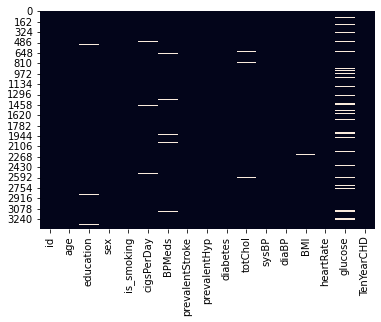

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df1.isnull(), cbar=False)

###What did you know about your dataset?

The dataset is about the patients information of a town in Massachussets and the goal is to predict wheteher the patient has a risk of getting a CHD.

The dataset has 3390 rows and 17 columns. There are no duplicate values but there are null/missing values in the dataset.

##***2. Understanding Your Variables***

In [13]:
#Dataset Columns
df1.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe
df1.describe(include='all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

###Variables Description

###Check Unique Values for each variable.


In [10]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


##***3. Data Wrangling***

###Data Wrangling Code

In [7]:
#dropping the id column
df1.drop(columns='id',axis=1,inplace=True)

In [17]:
df1['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

In [ ]:
df1['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
df1['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
df1['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df1['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [ ]:
df1['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
df1['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [ ]:
df1['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [ ]:
df1['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [ ]:
df1['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [ ]:
df1['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

In [ ]:
df1['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

In [ ]:
df1['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

In [ ]:
df1['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

In [ ]:
df1['glucose'].value_counts()

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

In [ ]:
df1['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#comparing CHD with BMI
df1.groupby('TenYearCHD')['BMI'].value_counts()

TenYearCHD  BMI  
0           22.54    14
            22.19    13
            22.91    13
            23.48    11
            22.01    10
                     ..
1           40.08     1
            40.52     1
            41.61     1
            43.69     1
            56.80     1
Name: BMI, Length: 1575, dtype: int64

In [ ]:
#comparing CHD with sysBP
df1.groupby('TenYearCHD')['sysBP'].value_counts()

TenYearCHD  sysBP
0           110.0    79
            130.0    79
            120.0    77
            115.0    65
            125.0    64
                     ..
1           217.0     1
            235.0     1
            244.0     1
            248.0     1
            295.0     1
Name: sysBP, Length: 364, dtype: int64

In [ ]:
#comparing CHD with diaBP
df1.groupby('TenYearCHD')['diaBP'].value_counts()

TenYearCHD  diaBP
0           80.0     184
            82.0     107
            70.0      97
            85.0      88
            87.0      86
                    ... 
1           108.0      1
            109.5      1
            112.5      1
            119.0      1
            129.0      1
Name: diaBP, Length: 233, dtype: int64

In [ ]:
#comparing CHD with totChol
df1.groupby('TenYearCHD')['totChol'].value_counts()

TenYearCHD  totChol
0           240.0      55
            210.0      43
            220.0      41
            230.0      37
            250.0      37
                       ..
1           380.0       1
            432.0       1
            439.0       1
            464.0       1
            600.0       1
Name: totChol, Length: 396, dtype: int64

In [ ]:
#comparing CHD with diabetes
df1.groupby('TenYearCHD')['diabetes'].value_counts()

TenYearCHD  diabetes
0           0           2825
            1             54
1           0            478
            1             33
Name: diabetes, dtype: int64

In [ ]:
#comparing CHD with HeartRate
df1.groupby('TenYearCHD')['heartRate'].value_counts()

TenYearCHD  heartRate
0           75.0         381
            80.0         250
            70.0         205
            85.0         169
            60.0         160
                        ... 
1           89.0           1
            93.0           1
            102.0          1
            104.0          1
            108.0          1
Name: heartRate, Length: 117, dtype: int64

In [ ]:
#comparing CHD with glucose
df1.groupby('TenYearCHD')['glucose'].value_counts()

TenYearCHD  glucose
0           75.0       127
            83.0       114
            70.0       108
            80.0       108
            77.0       105
                      ... 
1           274.0        1
            297.0        1
            320.0        1
            332.0        1
            368.0        1
Name: glucose, Length: 204, dtype: int64

In [ ]:
#comparing CHD with prevalentStroke
df1.groupby('TenYearCHD')['prevalentStroke'].value_counts()

TenYearCHD  prevalentStroke
0           0                  2867
            1                    12
1           0                   501
            1                    10
Name: prevalentStroke, dtype: int64

In [ ]:
#comparing CHD with prevalentHyp
df1.groupby('TenYearCHD')['prevalentHyp'].value_counts()

TenYearCHD  prevalentHyp
0           0               2065
            1                814
1           0                256
            1                255
Name: prevalentHyp, dtype: int64

In [ ]:
#comparing CHD with BPMeds
df1.groupby('TenYearCHD')['BPMeds'].value_counts()

TenYearCHD  BPMeds
0           0.0       2775
            1.0         67
1           0.0        471
            1.0         33
Name: BPMeds, dtype: int64

In [ ]:
#comparing CHD with CigsPerDay
df1.groupby('TenYearCHD')['cigsPerDay'].value_counts()

TenYearCHD  cigsPerDay
0           0.0           1467
            20.0           503
            15.0           146
            30.0           145
            9.0             95
            5.0             91
            10.0            89
            3.0             70
            40.0            45
            1.0             41
            25.0            34
            43.0            31
            2.0             14
            35.0            13
            6.0             11
            8.0             10
            4.0              7
            60.0             6
            7.0              5
            17.0             5
            50.0             5
            18.0             4
            23.0             4
            11.0             3
            13.0             3
            12.0             2
            16.0             2
            19.0             2
            45.0             2
            14.0             1
            38.0             1
            70.0

In [ ]:
#comparing CHD with is_smoking
df1.groupby('TenYearCHD')['is_smoking'].value_counts()

TenYearCHD  is_smoking
0           NO            1467
            YES           1412
1           YES            275
            NO             236
Name: is_smoking, dtype: int64

In [ ]:
#comparing CHD with sex
df1.groupby('TenYearCHD')['sex'].value_counts()

TenYearCHD  sex
0           F      1684
            M      1195
1           M       272
            F       239
Name: sex, dtype: int64

In [ ]:
#comparing CHD with age
df1.groupby('TenYearCHD')['age'].value_counts()

TenYearCHD  age
0           40     137
            39     134
            41     133
            42     131
            46     129
                  ... 
1           36       3
            35       2
            37       2
            69       1
            70       1
Name: age, Length: 75, dtype: int64

In [ ]:
#comparing CHD with education
df1.groupby('TenYearCHD')['education'].value_counts()

TenYearCHD  education
0           1.0          1135
            2.0           872
            3.0           479
            4.0           319
1           1.0           256
            2.0           118
            3.0            70
            4.0            54
Name: education, dtype: int64

###What all manipulations have you done and insights you found?

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


####Plot 1- Countplot of TenYearCHD (univariate analysis)

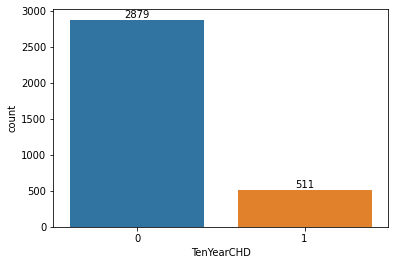

In [ ]:
ax=sns.countplot(data=df1,x='TenYearCHD')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 2- Barplot of TenYearCHD with sysBP (bivariate analysis)

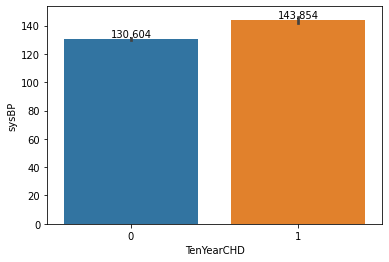

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='sysBP')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 3- Barplot of TenYearCHD with diaBP (bivariate analysis)

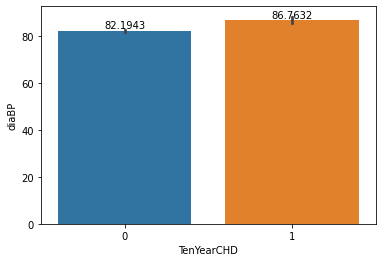

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='diaBP')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 4- Barplot of TenYearCHD with cigsPerDay (bivariate analysis)

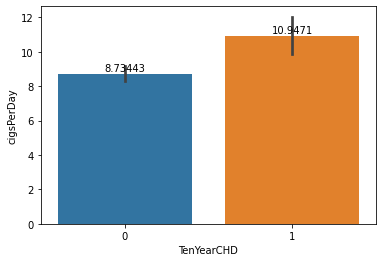

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='cigsPerDay')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 5- Barplot of TenYearCHD with BMI (bivariate analysis)

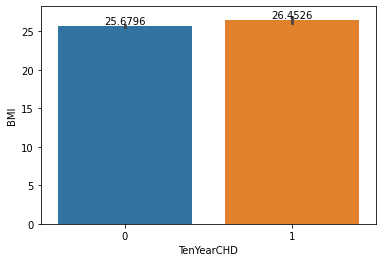

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='BMI')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 6- Barplot of TenYearCHD with heartRate (bivariate analysis)

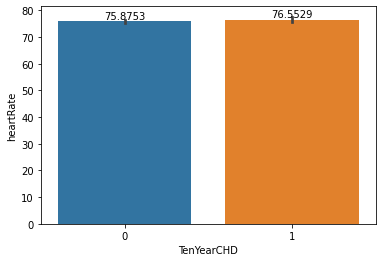

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='heartRate')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 7- Barplot of TenYearCHD with glucose (bivariate analysis)

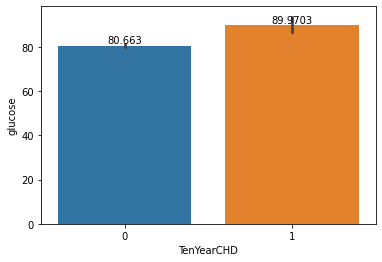

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='glucose')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 8- Barplot of TenYearCHD with age (bivariate analysis)

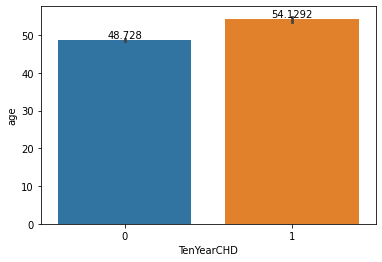

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='age')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 9- Barplot of TenYearCHD with totChol (bivariate analysis)

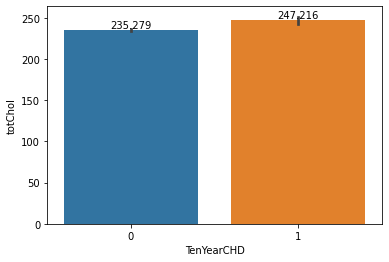

In [ ]:
ax=sns.barplot(data=df1,x='TenYearCHD',y='totChol')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 10- Correlation Heatmap (bivariate analysis)

<AxesSubplot:>

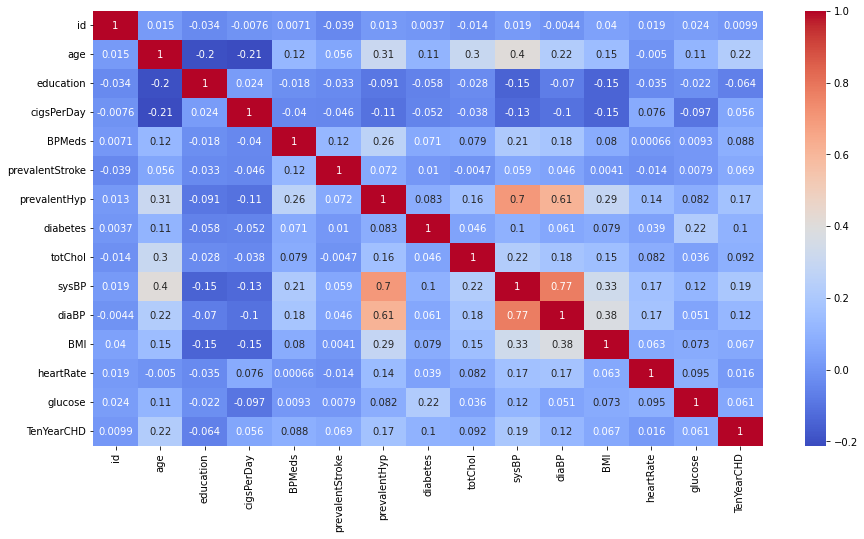

In [ ]:
plt.figure(figsize=(15,8))
correlation = df1.corr(method='spearman')
sns.heatmap((correlation), annot=True, cmap='coolwarm')

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 11- CountPlot of TenYearCHD and BPMeds (bivariate analysis)

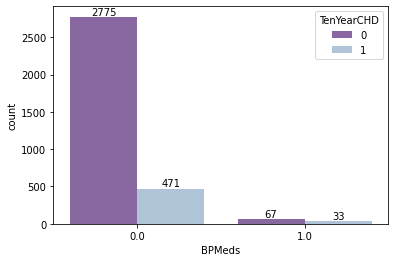

In [ ]:
ax=sns.countplot(data=df1,x='BPMeds',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 12- Countplot of TenYearCHD and prevalentStroke (bivariate analysis)

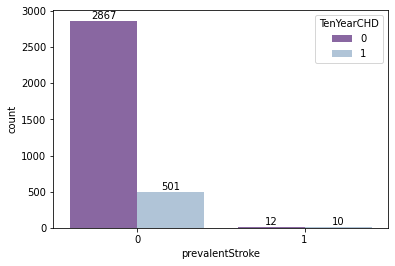

In [ ]:
ax=sns.countplot(data=df1,x='prevalentStroke',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 13- Countplot of TenYearCHD and prevalentHyp (bivariate analysis)

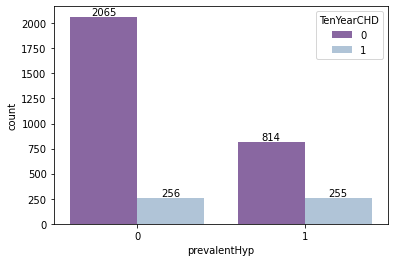

In [ ]:
ax=sns.countplot(data=df1,x='prevalentHyp',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 14- Countplot of TenYearCHD and with is_smoking (bivariate analysis)

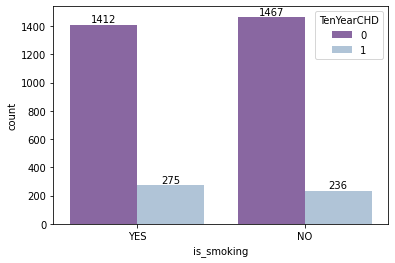

In [ ]:
ax=sns.countplot(data=df1,x='is_smoking',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 15- Countplot of TenYearCHD and diabetes (bivariate analysis)

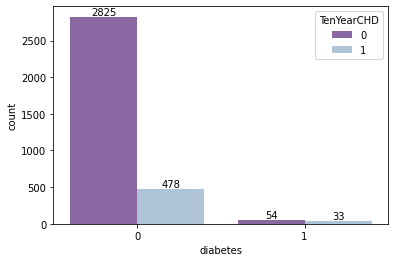

In [ ]:
ax=sns.countplot(data=df1,x='diabetes',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 16- Countplot of TenYearCHD and sex (bivariate analysis)

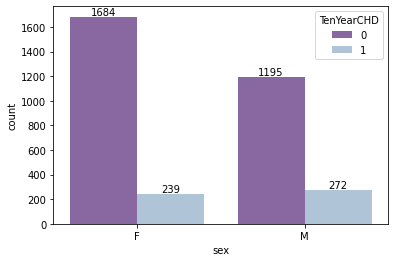

In [ ]:
ax=sns.countplot(data=df1,x='sex',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 17- Countplot of TenYearCHD and education (bivariate analysis)

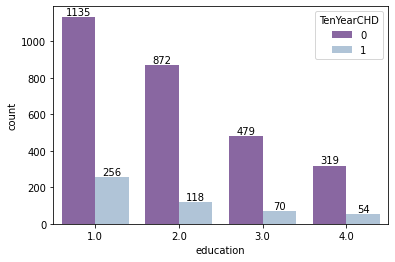

In [ ]:
ax=sns.countplot(data=df1,x='education',hue='TenYearCHD',palette='BuPu_r')
for i in ax.containers:
    ax.bar_label(i,)

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

####Plot 18- Pairplot of variables involved (multivariate analysis)

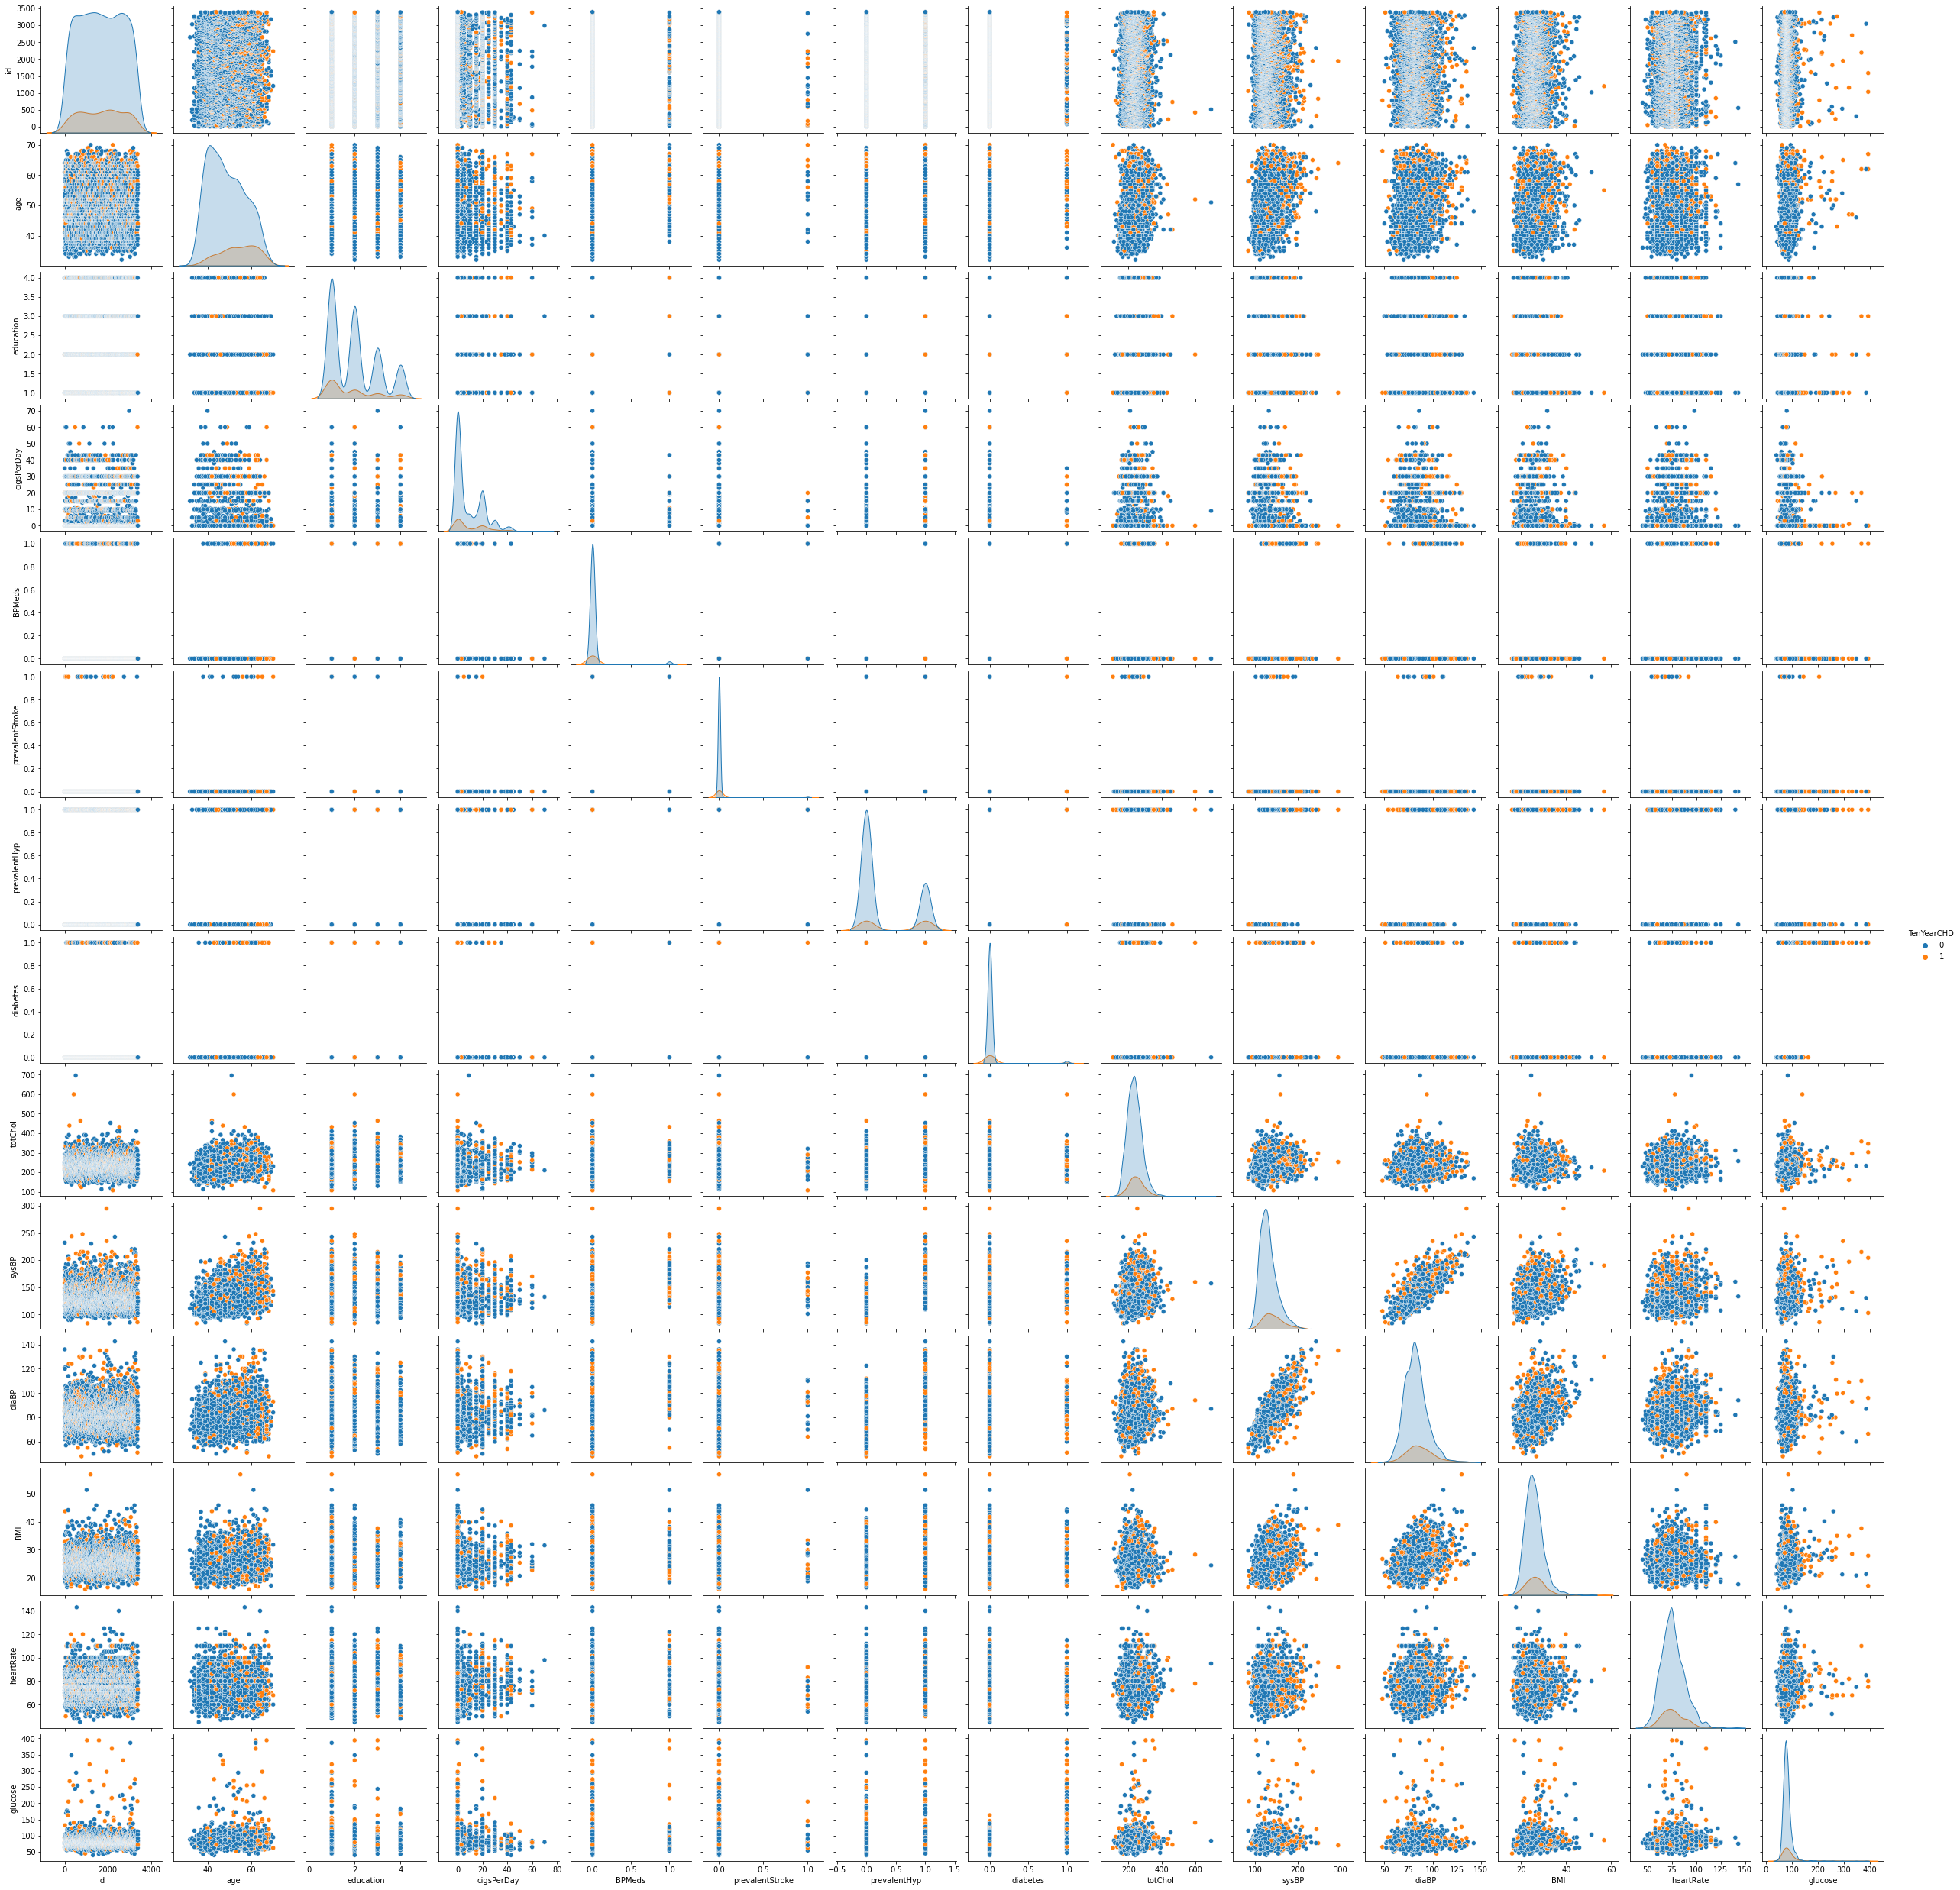

In [ ]:
#PairPlot
sns.pairplot(data=df1,hue='TenYearCHD')

#####1. Why did you pick the specific chart?

#####2. What is/are the insight(s) found from the chart?

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##***5. Hypothesis Testing***

Here in this project, assumptions haven't been made about the population to be tested with a certain sample size, so hypothesis testing isn't done.

##***6. Feature Engineering & Data Pre-processing***

###1. Handling Missing Values

In [6]:
#info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


From the above description columns education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose have null values.

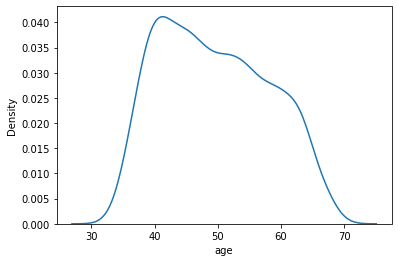

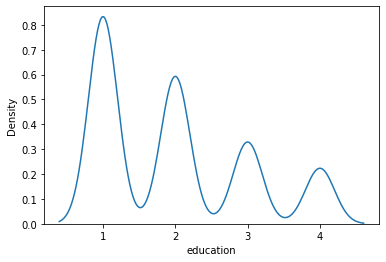

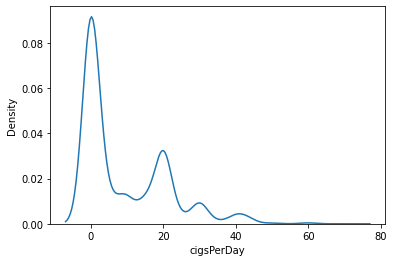

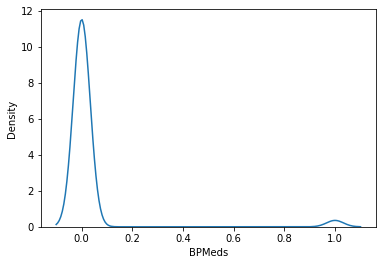

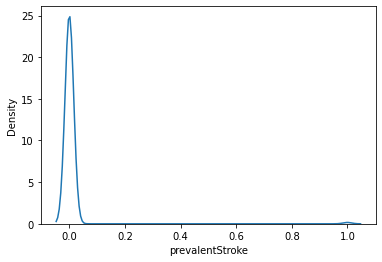

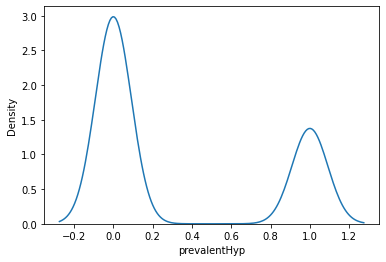

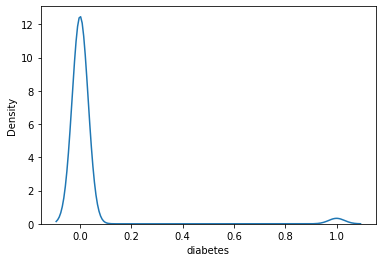

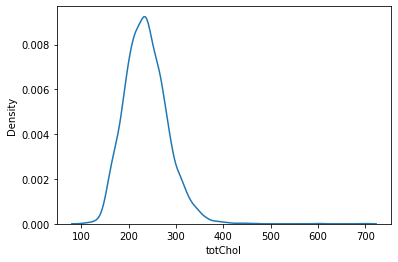

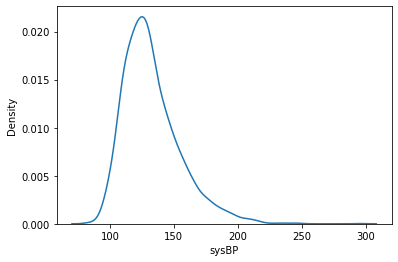

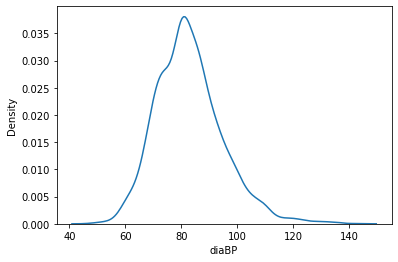

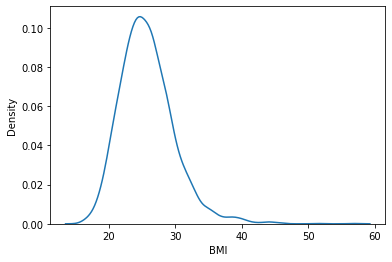

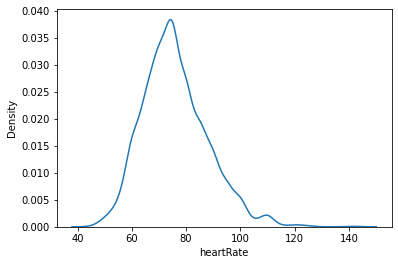

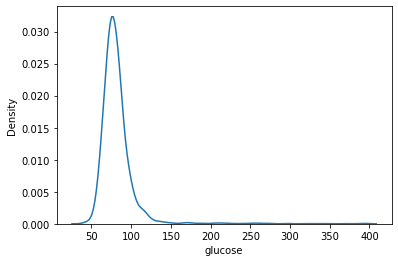

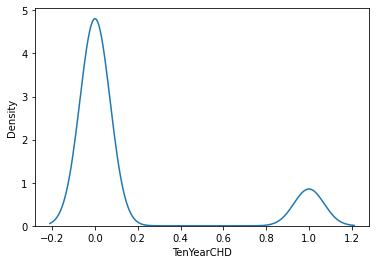

In [10]:
#generating kde plot of the features involved in the dataset.
for feature in df1.describe():
  plt.figure()
  sns.kdeplot(df1[feature])

The above plot shows the distribution of the features. Some are categorical an the others are numeric in nature.

In [8]:
df1['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [9]:
columns1=['totChol','BMI','heartRate','glucose']

In [10]:
#function to fill null values
def impute_nan(df,feature):
  df[feature]=df[feature].fillna(df[feature].median())

Here we are filling the null values of the numeric columns with the respective median values.

In [11]:
#function call
impute_nan(df1,columns1)

In [12]:
#null values check
df1.isnull().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [13]:
#function to fill null values
def impute1_nan(df,variable):
  df[variable]=df[variable].fillna(df[variable].mode()[0])

Here we are filling the categorical feature null values with the mode values.

In [14]:
#function call
impute1_nan(df1,'education')
impute1_nan(df1,'BPMeds')

In [15]:
#filling null values with mean
df1['cigsPerDay']=df1['cigsPerDay'].fillna(df1['cigsPerDay'].mean())

The missing values for the above feature have been imputed with the mean value.

In [16]:
#null values check
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now, the missing values have been treated.

####What all missing value imputation techniques have you used and why did you use those techniques?

Imputing with Mean, Median and Mode.

###2. Handling Outliers

<AxesSubplot:>

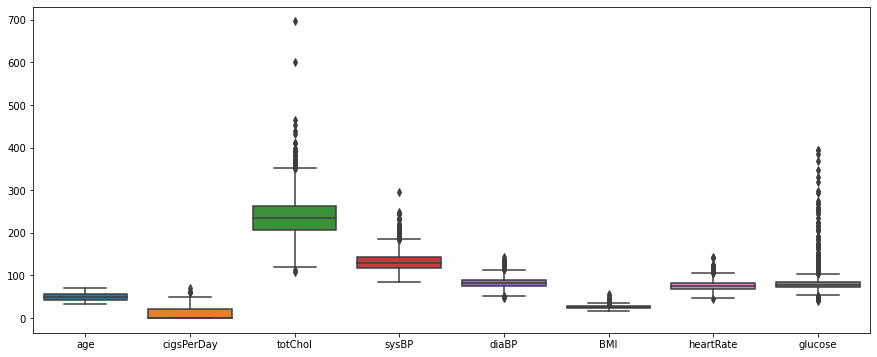

In [17]:
#generating boxplots for the numeric features
plt.figure(figsize=(15,6))
sns.boxplot(data=df1[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

In [18]:
#outlier analysis function
CRED = '\033[91m'
orange='\033[47m'
CEND = '\033[0m'
def outlieranalysis(df):
  columns2=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
  for feature in columns2:
    #statistics of feature
    print(f"{feature} statistics are {df[feature].describe()}")
    print('.................................................')
    iqr=df[feature].quantile(0.75)-df[feature].quantile(0.25)
    #Lower fence boundary points
    lower_bridge=df[feature].quantile(0.25)-iqr*1.5
    upper_bridge=df[feature].quantile(0.75)+iqr*1.5
    print(f"lower bridge value of {feature} is:{lower_bridge}")
    print(f"upper bridge value  of {feature} is :{upper_bridge}")
    #Outer fence boundary points
    lower_extreme=df[feature].quantile(0.25)-iqr*3
    upper_extreme=df[feature].quantile(0.75)+iqr*3
    print(f"lower extreme value of {feature} is : {lower_extreme}")
    print(f"upper extreme value of {feature} is : {upper_extreme}")
    #checking the percentage of outliers
    print(f"{orange}percentage of outliers exceeding upper bridge is: {len(df.loc[df[feature]>upper_bridge])/len(df[feature])*100}")
    print(f"{CEND}percentage of outliers preceeding lower bridge is: {len(df.loc[df[feature]<lower_bridge])/len(df[feature])*100}")
    print(f"{orange}percentage of outliers exceeding upper extreme is: {len(df.loc[df[feature]>upper_extreme])/len(df[feature])*100}")
    print(f"{CEND}percentage of outliers preceeding lower extreme is: {len(df.loc[df[feature]<lower_extreme])/len(df[feature])*100}")
    print('--------------------------------------------------')

In [19]:
outlieranalysis(df1)

age statistics are count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64
.................................................
lower bridge value of age is:21.0
upper bridge value  of age is :77.0
lower extreme value of age is : 0.0
upper extreme value of age is : 98.0
percentage of outliers exceeding upper bridge is: 0.0
percentage of outliers preceeding lower bridge is: 0.0
percentage of outliers exceeding upper extreme is: 0.0
percentage of outliers preceeding lower extreme is: 0.0
--------------------------------------------------
cigsPerDay statistics are count    3390.000000
mean        9.069477
std        11.840458
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64
.................................................
lower bridge value of cigsPerDay is:-30.0
uppe

From the output it is observed that for features totChol, sysBP, diaBP, BMI, heartRate and glucose the outliers exceeding upper bridge values are above 1%.

General Information of the Numeric Features:


Outlier Treatment

#####We perform outlier capping since the values in the dataset are important.

1.Outlier Capping on sysBP values

In [20]:
#capping using upper extreme points
df1.loc[df1['sysBP']>225,'sysBP']=225

2.Outlier Capping on diaBP values

In [21]:
#capping using upper extreme points
df1.loc[df1['diaBP']>136.5,'diaBP']=136.5

3.Outlier Capping on totChol values

In [22]:
#capping using upper bridge points
df1.loc[df1['totChol']>351,'totChol']=351

4.Outlier Capping on BMI values

In [23]:
#capping using upper extreme points
df1.loc[df1['BMI']>42.89,'BMI']=43

5.Outlier Capping on heartRate values

In [24]:
#capping using upper extreme points
df1.loc[df1['heartRate']>128,'heartRate']=128

6.Outlier Capping on glucose values

In [25]:
#capping using upper extreme points
df1.loc[df1['glucose']>124,'glucose']=124


In [26]:
#capping using lower bridge points
df1.loc[df1['glucose']<52.5,'glucose']=52

Now the outliers have been treated reasonably and boxplots are generated again.

<AxesSubplot:>

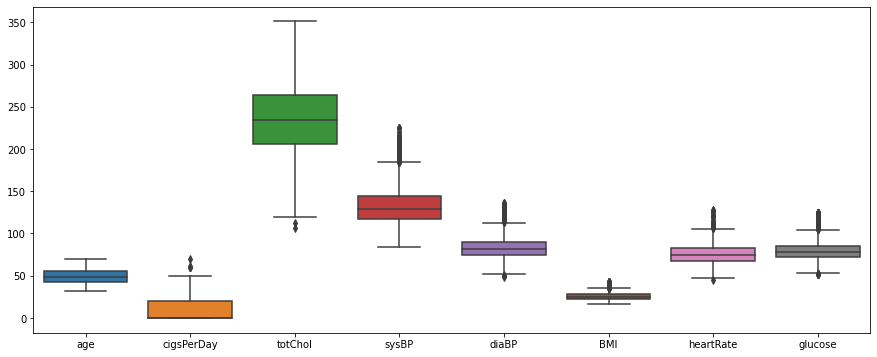

In [27]:
#generating boxplots for the numeric features
plt.figure(figsize=(15,6))
sns.boxplot(data=df1[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

The outliers have been reduced considerably from the initial boxplots.

###3. Categorical Encoding

In [28]:
#info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [29]:
#Label Encoding with replace
replacewith_nums = {"is_smoking":{'NO':0,'YES':1},
                    "sex":{'M':0,'F':1}}
df1 = df1.select_dtypes(include=['int','object','float64'])
df1 = df1.replace(replacewith_nums)
df1.head()                          

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    1           1         3.0     0.0                0   
1   36        4.0    0           0         0.0     0.0                0   
2   46        1.0    1           1        10.0     0.0                0   
3   50        1.0    0           1        20.0     0.0                0   
4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [30]:
#info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


####What all categorical encoding techniques have you used & why did you use those techniques?

The Categorical encoding technique used was Label encoding.

**Label encoding** is one of the simpler encoding techniques employed to convert categorical features to numeric features or assigning numeric categorical variables(like sex and is_smoking in this case) numeric labels.Many machine learning algorithms are designed to work with numerical inputs, and cannot handle categorical variables directly. 

###4. Textual Data Preprocessing

Not using in this project

###5. Feature Manipulation & Selection

####1. Feature Manipulation

In [31]:
#creation of new feature termed pulse pressure
df1['pulse_pressure']=df1['sysBP']-df1['diaBP']

Since we consider the difference in systolic and diastolic BP to calculate pulse pressure, we can now drop the systolic and diastolic BP columns.

In [32]:
# Dropping the systolic and diastolic BP columns
df1.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [33]:
df1['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [34]:
df1['cigsPerDay'].value_counts()

0.000000     1703
20.000000     606
30.000000     176
15.000000     172
10.000000     106
9.000000      104
5.000000      103
3.000000       79
40.000000      62
1.000000       48
25.000000      44
43.000000      42
9.069477       22
35.000000      17
2.000000       17
6.000000       14
8.000000       10
7.000000        8
60.000000       8
18.000000       7
4.000000        7
50.000000       6
17.000000       5
23.000000       5
11.000000       4
12.000000       3
13.000000       3
19.000000       2
16.000000       2
45.000000       2
14.000000       1
70.000000       1
38.000000       1
Name: cigsPerDay, dtype: int64

From the above 2 codes it could be observed that is_smoking having value as 0 is due to zero cigsPerDay. Therefore we can drop the feature is_smoking from the dataset.

In [35]:
# Dropping the is_smoking column
df1.drop(['is_smoking'], axis = 1, inplace = True)

In [36]:
#function to convert float values to integers
def conv_flotoin(df):
  cols=['education','cigsPerDay','BPMeds']
  for val in cols:
    df[val]=df[val].astype(int)

  


In [37]:
#function call
conv_flotoin(df1)

In [38]:
#dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   cigsPerDay       3390 non-null   int64  
 4   BPMeds           3390 non-null   int64  
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   BMI              3390 non-null   float64
 10  heartRate        3390 non-null   float64
 11  glucose          3390 non-null   float64
 12  TenYearCHD       3390 non-null   int64  
 13  pulse_pressure   3390 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 370.9 KB


###2. Feature Selection

<AxesSubplot:>

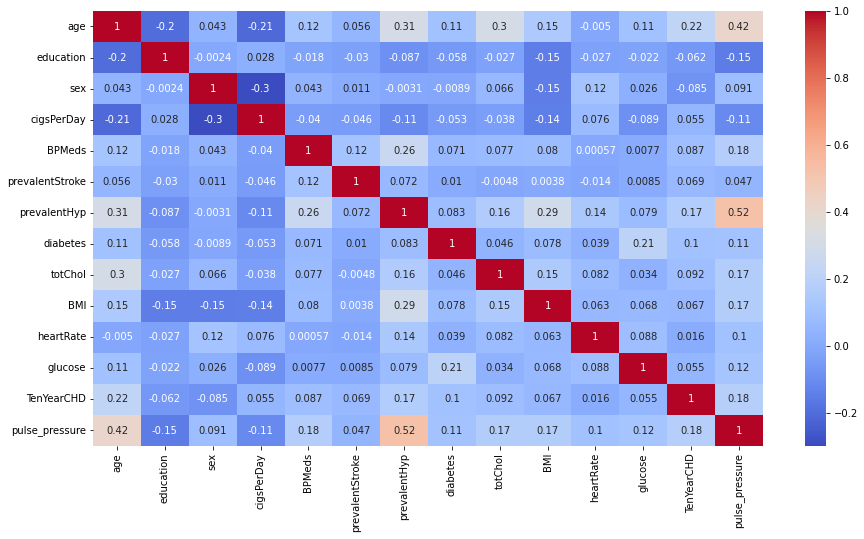

In [39]:
#generating heatmap for the features involved
plt.figure(figsize=(15,8))
correlation = df1.corr(method='spearman')
sns.heatmap((correlation), annot=True, cmap='coolwarm')

####What all feature selection methods have you used and why?


####Which all features you found important and why?

###6. Data Transformation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

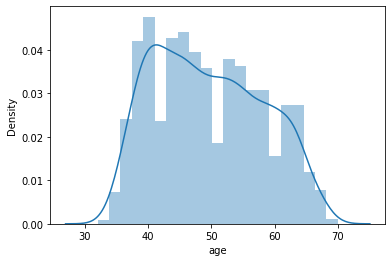

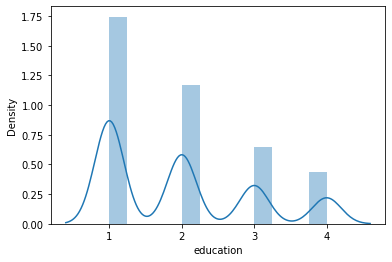

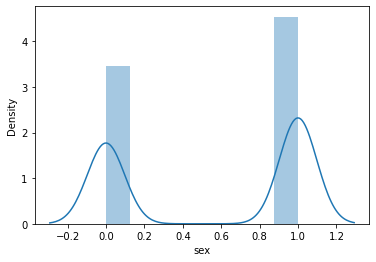

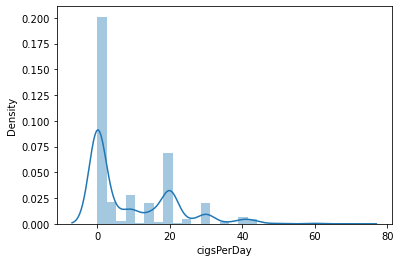

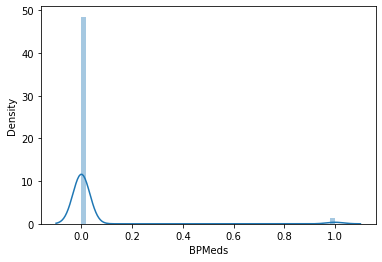

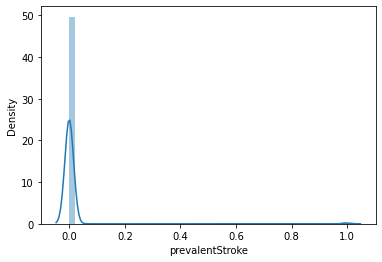

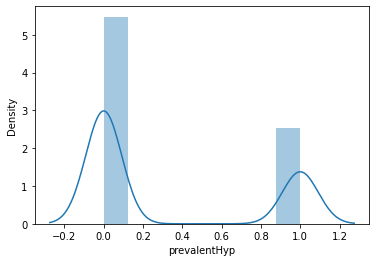

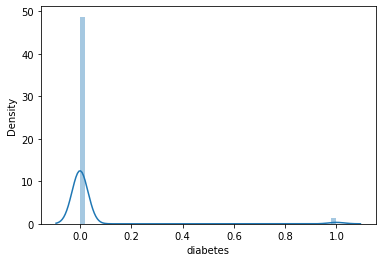

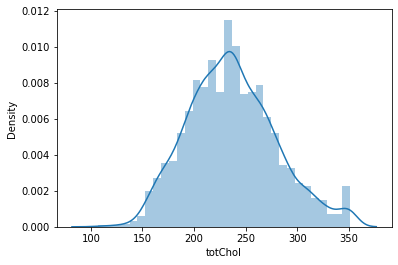

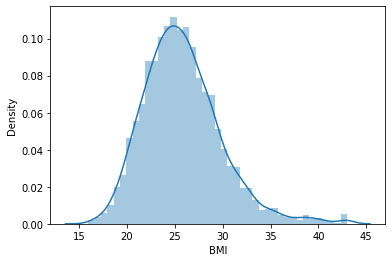

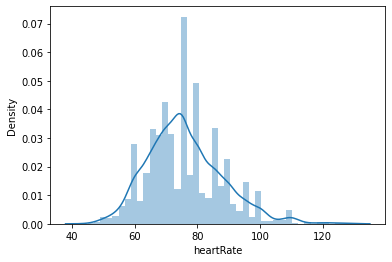

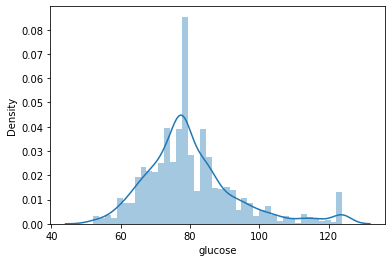

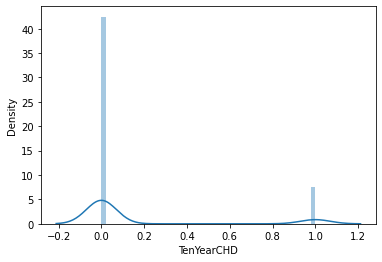

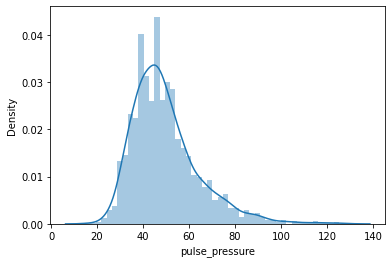

In [ ]:
#generating kde plot of the features involved in the dataset.
for feature in df1.describe():
  plt.figure()
  sns.distplot(df1[feature])

Here the data isn't transformed. Almost all of the numeric variables follow normal distribution except cigsPerDay. The cigsPerDay data isn't transformed here.

###7. Data Scaling

In [50]:
#description of the dataset
df1.describe()

age    education          sex   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean     49.542183     1.946018     0.567257     9.069027     0.029499   
std       8.592878     1.017568     0.495529    11.840459     0.169224   
min      32.000000     1.000000     0.000000     0.000000     0.000000   
25%      42.000000     1.000000     0.000000     0.000000     0.000000   
50%      49.000000     2.000000     1.000000     0.000000     0.000000   
75%      56.000000     3.000000     1.000000    20.000000     0.000000   
max      70.000000     4.000000     1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol          BMI  \
count      3390.000000   3390.000000  3390.000000  3390.000000  3390.000000   
mean          0.006490      0.315339     0.025664   236.533628    25.782888   
std           0.080309      0.464719     0.158153    42.854588     4.053030   
min           0.000000      0.000000     0.000000   107.000000    15.960000   
25%           0.000000      0.000000     0.000000   206.000000    23.030000   
50%           0.000000      0.000000     0.000000   234.000000    25.380000   
75%           0.000000      1.000000     0.000000   264.000000    27.997500   
max           1.000000      1.000000     1.000000   351.000000    43.000000   

         heartRate      glucose   TenYearCHD  pulse_pressure  
count  3390.000000  3390.000000  3390.000000     3390.000000  
mean     75.969027    80.215929     0.150737       49.675074  
std      11.930874    13.435572     0.357846       14.718018  
min      45.000000    52.000000     0.000000       15.000000  
25%      68.000000    72.000000     0.000000       40.000000  
50%      75.000000    78.000000     0.000000       47.000000  
75%      83.000000    85.000000     0.000000       56.000000  
max     128.000000   124.000000     1.000000      130.000000

In [40]:
#function to calaculate the range of numeric variables
def calcrange(df):
  for col in df1.columns:
    rge=df[col].max()-df[col].min()
    if rge>4:
      print(f'the range of {col} is {rge}')
    

In [41]:
#function call
calcrange(df1)

the range of age is 38
the range of cigsPerDay is 70
the range of totChol is 244.0
the range of BMI is 27.04
the range of heartRate is 83.0
the range of glucose is 72.0
the range of pulse_pressure is 115.0


Now since the range of variables age, cigsPerDay, totChol, BMI, heartRate ,glucose and pulse_pressure are in different values, it is better to scale these variables so the models can easily work with them. We use min max scaler for scaling.

In [42]:
#scaling
colsforscaling=['age','cigsPerDay','totChol','BMI','heartRate','glucose','pulse_pressure']
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
# Creating an instance for MinMax Scaler
scaler = MinMaxScaler()
# Scaling the independent variables
df1[colsforscaling] = scaler.fit_transform(df1[colsforscaling])

In [43]:
#dataset description
df1.describe()

age    education          sex   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean      0.461636     1.946018     0.567257     0.129558     0.029499   
std       0.226128     1.017568     0.495529     0.169149     0.169224   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.263158     1.000000     0.000000     0.000000     0.000000   
50%       0.447368     2.000000     1.000000     0.000000     0.000000   
75%       0.631579     3.000000     1.000000     0.285714     0.000000   
max       1.000000     4.000000     1.000000     1.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol          BMI  \
count      3390.000000   3390.000000  3390.000000  3390.000000  3390.000000   
mean          0.006490      0.315339     0.025664     0.530876     0.363272   
std           0.080309      0.464719     0.158153     0.175634     0.149890   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           0.000000      0.000000     0.000000     0.405738     0.261464   
50%           0.000000      0.000000     0.000000     0.520492     0.348373   
75%           0.000000      1.000000     0.000000     0.643443     0.445174   
max           1.000000      1.000000     1.000000     1.000000     1.000000   

         heartRate      glucose   TenYearCHD  pulse_pressure  
count  3390.000000  3390.000000  3390.000000     3390.000000  
mean      0.373121     0.391888     0.150737        0.301522  
std       0.143745     0.186605     0.357846        0.127983  
min       0.000000     0.000000     0.000000        0.000000  
25%       0.277108     0.277778     0.000000        0.217391  
50%       0.361446     0.361111     0.000000        0.278261  
75%       0.457831     0.458333     0.000000        0.356522  
max       1.000000     1.000000     1.000000        1.000000

In [44]:
#function call to check again if all these variables have been scaled.
calcrange(df1)

All the required variables have been scaled.

### 8. Handling Imbalanced Dataset

In [45]:
#dividing the dataset into X and y respectively
X=df1.loc[:,df1.columns!='TenYearCHD']
y=df1['TenYearCHD']

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


<AxesSubplot:ylabel='TenYearCHD'>

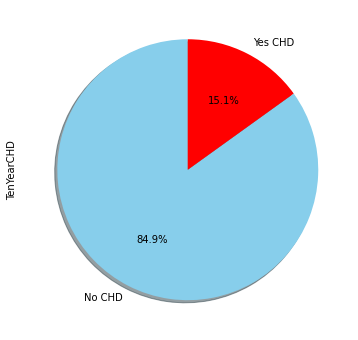

In [46]:
# Chart - 1 visualization code
# Target Column Value Counts
print(df1['TenYearCHD'].value_counts())
print(" ")
# Dependant Variable Column Visualization
df1['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No CHD','Yes CHD'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [47]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 3390 rows and 13 columns
y has 3390 rows


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Using SMOTE to oversample
smote=SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [50]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


In [51]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 85:15. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. So the dataset should be balanced before it going for the model creation part.

### 9. Data Splitting

In [52]:
#Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Observations' number in train and test datasets
print("Oservations in X_train dataset: ", X_train.shape)
print("Observations in y_train dataset: ", y_train.shape)
print("Observations in X_test dataset: ", X_test.shape)
print("Observations in y_test dataset: ", y_test.shape)

Oservations in X_train dataset:  (4030, 13)
Observations in y_train dataset:  (4030,)
Observations in X_test dataset:  (1728, 13)
Observations in y_test dataset:  (1728,)


Here the splitting ratio is 70:30 for train and test data respectively.

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

##**7. ML Model Implementation**

In [53]:
# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import KFold

In [54]:
cv=StratifiedKFold(n_splits=15)

### ML Model - 1 - **Implementing Logistic Regression**

The above model is the baseline model.

In [55]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [56]:
# Checking the coefficients
clf.coef_

array([[ 2.69113067, -0.00296914, -0.3152066 ,  1.72441503, -0.13689395,
        -0.01746814,  0.30902071,  0.41247328,  0.64438653, -0.22301778,
        -0.27669924,  0.38122189,  1.73060742]])

In [57]:
# Checking the intercept value
clf.intercept_

array([-2.45243736])

In [58]:
# Predict on the model
# Get the predicted probabilities
train_pred = clf.predict_proba(X_train)
test_pred = clf.predict_proba(X_test)

In [59]:
# Get the predicted classes
train_class_pred = clf.predict(X_train)
test_class_pred = clf.predict(X_test)

In [60]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_pred)
test_accuracy = accuracy_score(y_test,test_class_pred)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6679900744416873
The accuracy on test data is  0.6851851851851852


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1294  699]
 [ 639 1398]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

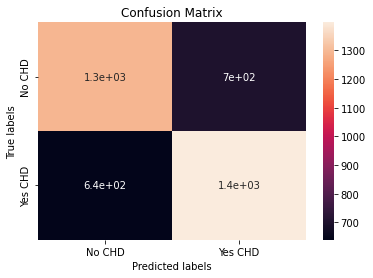

In [61]:
# Visualizing evaluation Metric Score chart
# confusion matrix for both train data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_train, train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[602 284]
 [260 582]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

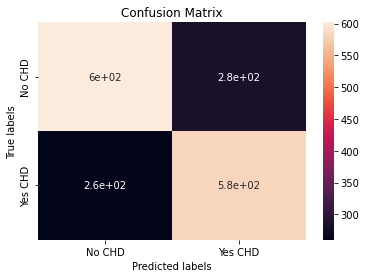

In [62]:
# confusion matrix for test data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [63]:
#classification report for train data
print(metrics.classification_report(train_class_pred, y_train))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_train, train_class_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1933
           1       0.69      0.67      0.68      2097

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

 
roc_auc_score
0.6677879204609358


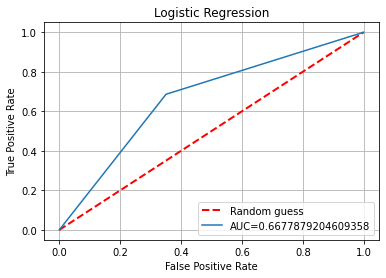

In [68]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.grid()
plt.show()

In [64]:
#classification report for test data
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       862
           1       0.69      0.67      0.68       866

    accuracy                           0.69      1728
   macro avg       0.69      0.69      0.69      1728
weighted avg       0.69      0.69      0.69      1728

 
roc_auc_score
0.6853348203514151


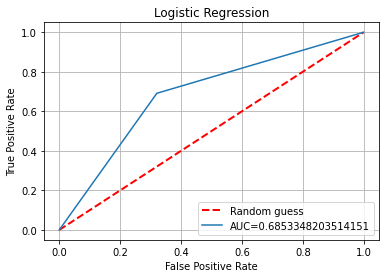

In [77]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logisticmodel = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logisticmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

# Predict on the model
# Get the predicted classes
train_class_pred_logis = grid_result.predict(X_train)
test_class_pred_logis = grid_result.predict(X_test)

In [66]:
#accuracy score,precision score,recall score, f1 score, roc_auc score for the model
logis_accuracy=	round(metrics.accuracy_score(y_test,test_class_pred_logis)*100,2)
logis_recall=round(metrics.recall_score(y_test,test_class_pred_logis)*100,2)
logis_precision=round(metrics.precision_score(y_test,test_class_pred_logis)*100,2)
logis_f1=round(metrics.f1_score(y_test,test_class_pred_logis,average='weighted')*100,2)
logis_roc_auc=round(metrics.roc_auc_score(y_test,test_class_pred_logis)*100,2)
print(f'Accuarcy of the model is:{logis_accuracy}')
print(f'Recall of the model is:{logis_recall}')
print(f'Precision of the model is:{logis_precision}')
print(f'f1 score of the model is:{logis_f1}')
print(f'roc_auc score of the model is:{logis_roc_auc}')

Accuarcy of the model is:68.17
Recall of the model is:68.76
Precision of the model is:66.86
f1 score of the model is:68.18
roc_auc score of the model is:68.19


In [67]:
print(metrics.classification_report(train_class_pred_logis, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_pred_logis))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1913
           1       0.69      0.67      0.68      2117

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

 
roc_auc_score
0.669719078138236


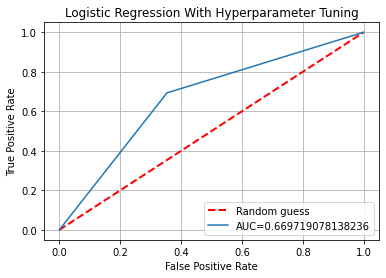

In [68]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred_logis)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred_logis)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression With Hyperparameter Tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

In [69]:
print(metrics.classification_report(test_class_pred_logis, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred_logis))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       862
           1       0.69      0.67      0.68       866

    accuracy                           0.68      1728
   macro avg       0.68      0.68      0.68      1728
weighted avg       0.68      0.68      0.68      1728

 
roc_auc_score
0.6818603454099934


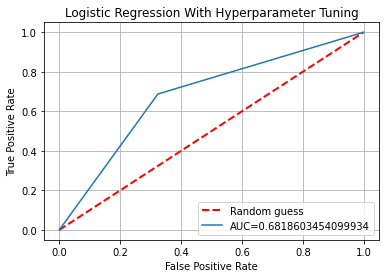

In [83]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred_logis)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred_logis)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression With Hyperparameter Tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 2 - **Implementing Decision Tree Classifier**

In [70]:
# ML Model - 1 Implementation
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
# Fit the Algorithm
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# Get the predicted classes
train_class_pred = dtc.predict(X_train)
test_class_pred = dtc.predict(X_test)

In [72]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.7870370370370371


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1993    0]
 [   0 2037]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

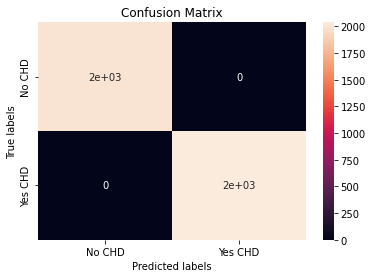

In [73]:
# Visualizing evaluation Metric Score chart
# confusion matrix for train data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_train, train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[680 206]
 [162 680]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

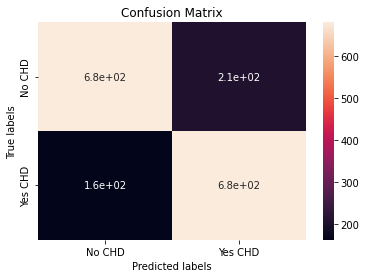

In [74]:
# confusion matrix for test data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [75]:
#classification report for train data
print(metrics.classification_report(train_class_pred, y_train))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_train, train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      2037

    accuracy                           1.00      4030
   macro avg       1.00      1.00      1.00      4030
weighted avg       1.00      1.00      1.00      4030

 
roc_auc_score
1.0


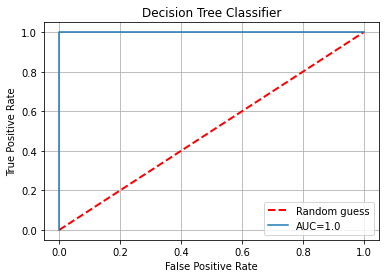

In [80]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree Classifier')
plt.legend(loc=4)
plt.grid()
plt.show()

In [76]:
#classification report for test data
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       842
           1       0.81      0.77      0.79       886

    accuracy                           0.79      1728
   macro avg       0.79      0.79      0.79      1728
weighted avg       0.79      0.79      0.79      1728

 
roc_auc_score
0.7875476533889536


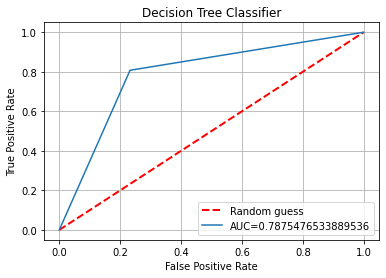

In [77]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree Classifier')
plt.legend(loc=4)
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtchmodel = DecisionTreeClassifier()
criterion=['gini','entropy','log_loss']
max_depth=[3,7,11,15,19]
min_samples_split=[10,20,30]
min_samples_leaf=[10,20]
# define grid search
grid = dict(max_depth=max_depth,criterion=criterion,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
grid_search = GridSearchCV(estimator=dtchmodel, param_grid=grid, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

# Predict on the model
# Get the predicted classes
train_class_pred_dtch = grid_result.predict(X_train)
test_class_pred_dtch = grid_result.predict(X_test)

In [79]:
#accuracy score,precision score,recall score, f1 score, roc_auc score for the model for test data
dtch_accuracy=	round(metrics.accuracy_score(y_test,test_class_pred_dtch)*100,2)
dtch_recall=round(metrics.recall_score(y_test,test_class_pred_dtch)*100,2)
dtch_precision=round(metrics.precision_score(y_test,test_class_pred_dtch)*100,2)
dtch_f1=round(metrics.f1_score(y_test,test_class_pred_dtch,average='weighted')*100,2)
dtch_roc_auc=round(metrics.roc_auc_score(y_test,test_class_pred_dtch)*100,2)
print(f'Accuarcy of the model is:{dtch_accuracy}')
print(f'Recall of the model is:{dtch_recall}')
print(f'Precision of the model is:{dtch_precision}')
print(f'f1 score of the model is:{dtch_f1}')
print(f'roc_auc score of the model is:{dtch_roc_auc}')

Accuarcy of the model is:75.98
Recall of the model is:71.5
Precision of the model is:77.48
f1 score of the model is:75.93
roc_auc score of the model is:75.87


In [80]:
#classification report on train data
print(metrics.classification_report(train_class_pred_dtch, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_pred_dtch))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2036
           1       0.86      0.88      0.87      1994

    accuracy                           0.87      4030
   macro avg       0.87      0.87      0.87      4030
weighted avg       0.87      0.87      0.87      4030

 
roc_auc_score
0.8713170372198621


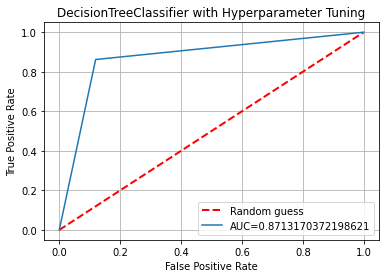

In [81]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred_dtch)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred_dtch)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('DecisionTreeClassifier with Hyperparameter Tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

In [82]:
#classification report for the test data
print(metrics.classification_report(test_class_pred_dtch, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred_dtch))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       951
           1       0.71      0.77      0.74       777

    accuracy                           0.76      1728
   macro avg       0.76      0.76      0.76      1728
weighted avg       0.76      0.76      0.76      1728

 
roc_auc_score
0.7587237202618724


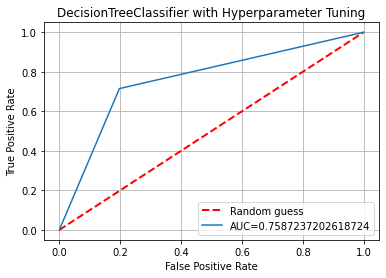

In [88]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred_dtch)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred_dtch)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('DecisionTreeClassifier with Hyperparameter Tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 3 - **Implementing Random Forest Classifier**

In [83]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_pred = rf_model.predict(X_train)
test_class_pred = rf_model.predict(X_test)

In [84]:
# Calculating accuracy on train and test data
train_accuracy = accuracy_score(y_train,train_class_pred)
test_accuracy = accuracy_score(y_test,test_class_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8640046296296297


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1993    0]
 [   0 2037]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

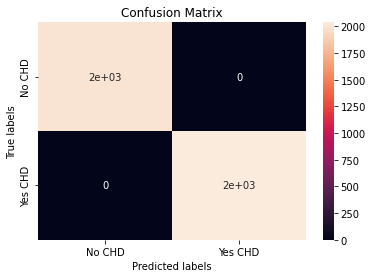

In [85]:
# Visualizing evaluation Metric Score chart
# confusion matrix for train data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_train, train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[761 125]
 [110 732]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

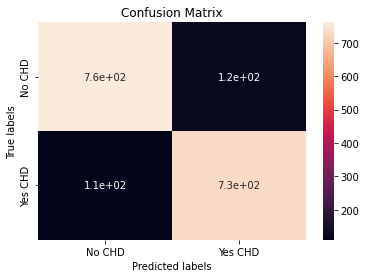

In [86]:
# confusion matrix for test data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [87]:
#classification report for train data
print(metrics.classification_report(train_class_pred, y_train))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_train, train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      2037

    accuracy                           1.00      4030
   macro avg       1.00      1.00      1.00      4030
weighted avg       1.00      1.00      1.00      4030

 
roc_auc_score
1.0


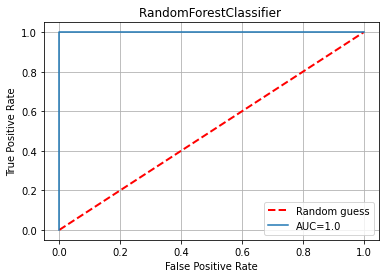

In [94]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RandomForestClassifier ')
plt.legend(loc=4)
plt.grid()
plt.show()

In [88]:
#classification report for the test data
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       871
           1       0.87      0.85      0.86       857

    accuracy                           0.86      1728
   macro avg       0.86      0.86      0.86      1728
weighted avg       0.86      0.86      0.86      1728

 
roc_auc_score
0.864137574194517


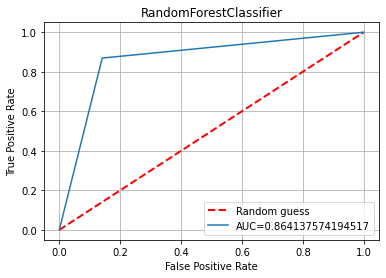

In [96]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc=4)
plt.grid()
plt.show()

Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next trying to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [10,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = cv, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_pred_rf = rf_grid.predict(X_train)
test_class_pred_rf = rf_grid.predict(X_test)


Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_s

In [90]:
#accuracy score,precision score,recall score, f1 score, roc_auc score for the model for test data
rf_accuracy=	round(metrics.accuracy_score(y_test,test_class_pred_rf)*100,2)
rf_recall=round(metrics.recall_score(y_test,test_class_pred_rf)*100,2)
rf_precision=round(metrics.precision_score(y_test,test_class_pred_rf)*100,2)
rf_f1=round(metrics.f1_score(y_test,test_class_pred_rf,average='weighted')*100,2)
rf_roc_auc=round(metrics.roc_auc_score(y_test,test_class_pred_rf)*100,2)
print(f'Accuarcy of the model is:{rf_accuracy}')
print(f'Recall of the model is:{rf_recall}')
print(f'Precision of the model is:{rf_precision}')
print(f'f1 score of the model is:{rf_f1}')
print(f'roc_auc score of the model is:{rf_roc_auc}')

Accuarcy of the model is:82.29
Recall of the model is:81.95
Precision of the model is:81.75
f1 score of the model is:82.29
roc_auc score of the model is:82.28


In [91]:
print(metrics.classification_report(train_class_pred_rf, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1982
           1       0.94      0.94      0.94      2048

    accuracy                           0.94      4030
   macro avg       0.94      0.94      0.94      4030
weighted avg       0.94      0.94      0.94      4030

 
roc_auc_score
0.9411542509731531


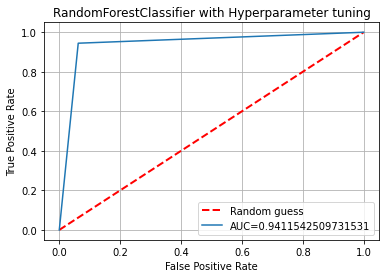

In [100]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred_rf)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred_rf)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RandomForestClassifier with Hyperparameter tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

In [92]:
#classification report for the test data
print(metrics.classification_report(test_class_pred_rf, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       884
           1       0.82      0.82      0.82       844

    accuracy                           0.82      1728
   macro avg       0.82      0.82      0.82      1728
weighted avg       0.82      0.82      0.82      1728

 
roc_auc_score
0.8228312681297351


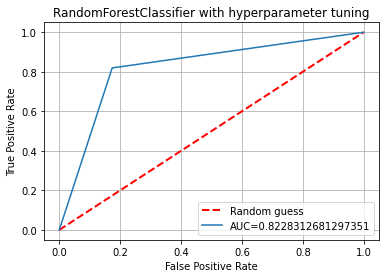

In [102]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred_rf)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred_rf)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('RandomForestClassifier with hyperparameter tuning')
plt.legend(loc=4)
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 4 - **Implementing XgBoost Classifier**

In [93]:
# ML Model - 4 Implementation
# Create an instance of the XGBoostClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_pred = xg_models.predict(X_train)
test_class_pred = xg_models.predict(X_test)

In [94]:
# Calculating accuracy on train and test data
train_accuracy = accuracy_score(y_train,train_class_pred)
test_accuracy = accuracy_score(y_test,test_class_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9945409429280397
The accuracy on test dataset is 0.8952546296296297


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1992    1]
 [  21 2016]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

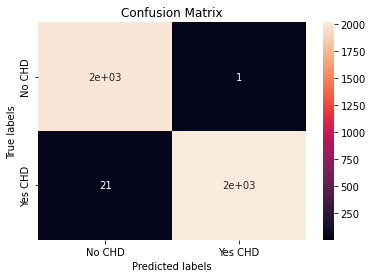

In [95]:
# Visualizing evaluation Metric Score chart
# confusion matrix for train data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_train, train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[818  68]
 [113 729]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'Yes CHD')]

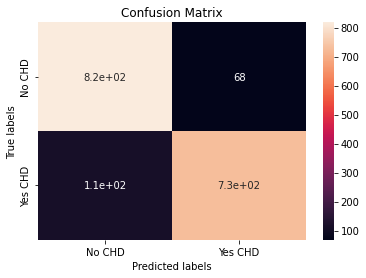

In [96]:
# confusion matrix for test data

labels = ['No CHD', 'Yes CHD']
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [97]:
#classification report for train data
print(metrics.classification_report(train_class_pred, y_train))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_train, train_class_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2013
           1       0.99      1.00      0.99      2017

    accuracy                           0.99      4030
   macro avg       0.99      0.99      0.99      4030
weighted avg       0.99      0.99      0.99      4030

 
roc_auc_score
0.9945944827514859


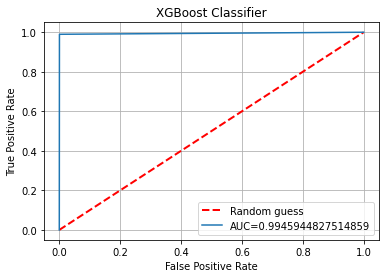

In [106]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('XGBoost Classifier')
plt.grid()
plt.show()

In [98]:
#classification report for test data
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_test, test_class_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       931
           1       0.87      0.91      0.89       797

    accuracy                           0.90      1728
   macro avg       0.89      0.90      0.89      1728
weighted avg       0.90      0.90      0.90      1728

 
roc_auc_score
0.894523144399822


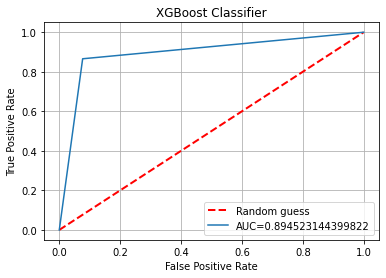

In [108]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('XGBoost Classifier')
plt.grid()
plt.show()

Then, I used XGBoost algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next trying to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [5,10,15]

# Maximum depth of trees
max_depth = [12]

# Minimum number of samples required to split a node
min_samples_split = [20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = cv, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_pred_xgb = xg_grid1.predict(X_train)
test_class_pred_xgb = xg_grid1.predict(X_test)

Fitting 15 folds for each of 3 candidates, totalling 45 fits
[08:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=12, min_samples_leaf=5, min_samples_split=20, n_estimators=5; total time=   0.1s
[08:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=12, min_samples_leaf=5, min_samples_split=20, n_estimators=5; total time=   0.1s
[08:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=12, min_samples_leaf=5, min_samples_split=20, n_estimators=5; total time=   0.1s
[08:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=12, min_samples_leaf=5, min_samples_split=20, n_estimators=5; total time=   0.1s
[08:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "

In [100]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.937165 using {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 15}


In [101]:
#accuracy score,precision score,recall score, f1 score, roc_auc score for the model for test data
xgb_accuracy=	round(metrics.accuracy_score(y_test,test_class_pred_xgb)*100,2)
xgb_recall=round(metrics.recall_score(y_test,test_class_pred_xgb)*100,2)
xgb_precision=round(metrics.precision_score(y_test,test_class_pred_xgb)*100,2)
xgb_f1=round(metrics.f1_score(y_test,test_class_pred_xgb,average='weighted')*100,2)
xgb_roc_auc=round(metrics.roc_auc_score(y_test,test_class_pred_xgb)*100,2)
print(f'Accuarcy of the model is:{xgb_accuracy}')
print(f'Recall of the model is:{xgb_recall}')
print(f'Precision of the model is:{xgb_precision}')
print(f'f1 score of the model is:{xgb_f1}')
print(f'roc_auc score of the model is:{xgb_roc_auc}')

Accuarcy of the model is:86.86
Recall of the model is:85.63
Precision of the model is:87.18
f1 score of the model is:86.86
roc_auc score of the model is:86.83


In [102]:
print(metrics.classification_report(train_class_pred_xgb, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.99      0.99      0.99      2029

    accuracy                           0.99      4030
   macro avg       0.99      0.99      0.99      4030
weighted avg       0.99      0.99      0.99      4030

 
roc_auc_score
0.987116912137991


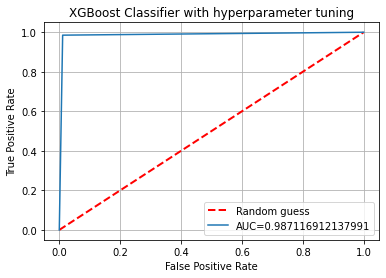

In [103]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_train,  train_class_pred_xgb)

#create ROC curve
auc=metrics.roc_auc_score(y_train, train_class_pred_xgb)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('XGBoost Classifier with hyperparameter tuning')
plt.grid()
plt.show()

In [104]:
#classification report for test data
print(metrics.classification_report(test_class_pred_xgb, y_test))
print(" ")

print("roc_auc_score")

print(metrics.roc_auc_score(y_test, test_class_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       901
           1       0.86      0.87      0.86       827

    accuracy                           0.87      1728
   macro avg       0.87      0.87      0.87      1728
weighted avg       0.87      0.87      0.87      1728

 
roc_auc_score
0.8683278553160002


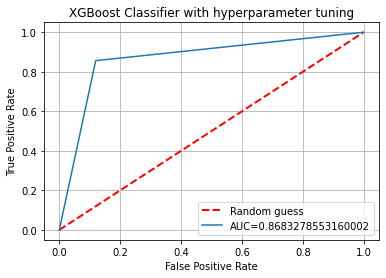

In [115]:
#visualizing the roc curve
#define metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  test_class_pred_xgb)

#create ROC curve
auc=metrics.roc_auc_score(y_test, test_class_pred_xgb)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('XGBoost Classifier with hyperparameter tuning')
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Snippet of Prediction of Labels From XGBoost Classifier Model

In [105]:
#creating a dataframe of actual and predicted TenYearCHD values
true_and_preds=pd.DataFrame(zip(y_test,test_class_pred_xgb),columns=['Actual','Predicted'])

In [106]:
#snippet of predictions and actual values of TenYearCHD
true_and_preds.head(10)

Actual  Predicted
0       0          0
1       1          1
2       1          1
3       1          1
4       0          0
5       0          0
6       1          1
7       1          1
8       0          0
9       1          0

In [107]:
#Creating a dataframe
models =pd.DataFrame({
    'Model': ['Logistic_Regression', 'Decision Tree Classifier','Random Forest Classifier',
              'XGBoost Classifier'],
     'Accuracy'  :[logis_accuracy,dtch_accuracy,rf_accuracy,xgb_accuracy],     
    'Precision': [logis_precision,dtch_precision,rf_precision,xgb_precision],
    'Recall':[logis_recall,dtch_recall,rf_recall,xgb_recall],
    'f1 score':[logis_f1,dtch_f1,rf_f1,xgb_f1],
    'roc_auc_score':[logis_roc_auc,dtch_roc_auc,rf_roc_auc,xgb_roc_auc]})

In [108]:
#models comparison table
models

Model  Accuracy  Precision  Recall  f1 score  \
0       Logistic_Regression     68.17      66.86   68.76     68.18   
1  Decision Tree Classifier     75.98      77.48   71.50     75.93   
2  Random Forest Classifier     82.29      81.75   81.95     82.29   
3        XGBoost Classifier     86.86      87.18   85.63     86.86   

   roc_auc_score  
0          68.19  
1          75.87  
2          82.28  
3          86.83

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

####SHAP: Shapley Additive Explanations

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

####SHAP Implementation

In [109]:
#SHAP
!pip install shap
from sklearn.tree import export_graphviz
import shap 
import graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 18.9 MB/s eta 0:00:00


In [110]:
sns.set_style('darkgrid') 

In [111]:
print(X_train.shape)
print(X_test.shape)


(4030, 13)
(1728, 13)


In [112]:
# Prepares a default instance of the XGBoost Classifier
model = XGBClassifier(max_depth=12,n_estimators=15,min_samples_split=20,min_samples_leaf=5)
# Fits the model on the data
model.fit(X_train, y_train)

[08:10:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, min_samples_split=20,
              missing=nan, monotone_constraints=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

In [113]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

In [114]:
shap_values = explainer(X_test)

Permutation explainer: 1729it [03:31,  8.09it/s]


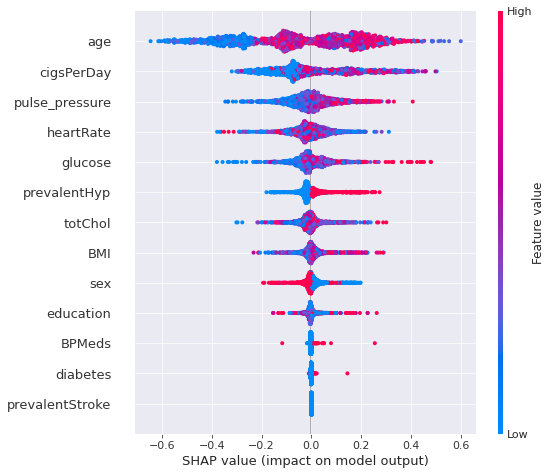

In [115]:
#summary plot
shap.summary_plot(shap_values)

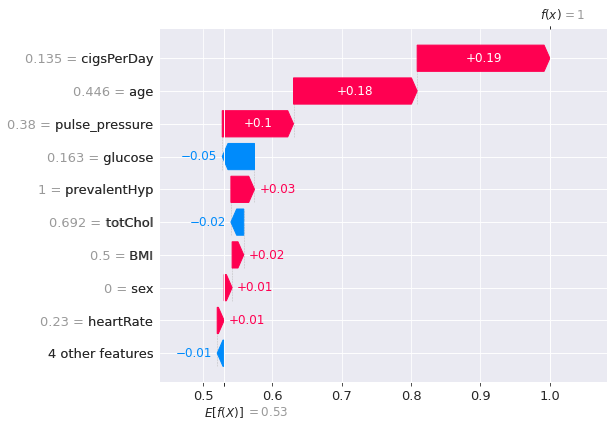

In [116]:
#waterfall plot
shap.plots.waterfall(shap_values[20], max_display=10)

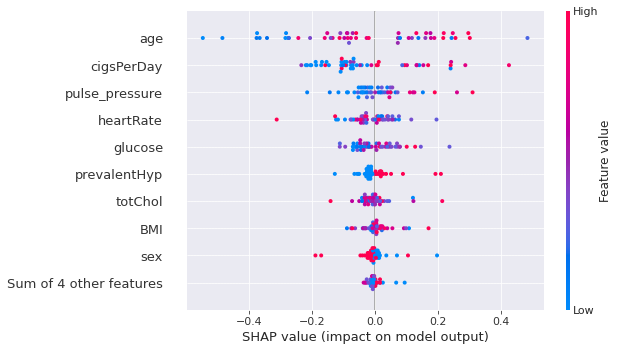

In [117]:
# Plots the beeswarm plot
shap.plots.beeswarm(shap_values.sample(50))